# Random Undersampling

Random undersampling là việc trích xuất ngẫu nhiên các mẫu từ lớp đa số cho đến khi chúng đạt được tỉ lệ nhất định so với lớp thiểu số, thường là 50:50.

Tiêu chí cho việc loại bỏ dữ liệu: Ngẫu nhiên
Kích thước bộ dữ liệu cuối cùng: 2 lần lớp thiểu số.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

from imblearn.under_sampling import RandomUnderSampler

## Create data

In [1]:
def make_data(sep):
    
    # returns arrays
    X, y = make_classification(n_samples=1000,
                           n_features=2,
                           n_redundant=0,
                           n_clusters_per_class=1,
                           weights=[0.99],
                           class_sep=sep,# how separate the classes are
                           random_state=1)
    
    # trasform arrays into pandas df and series
    X = pd.DataFrame(X, columns =['varA', 'varB'])
    y = pd.Series(y)
    
    return X, y

0    983
1     17
dtype: int64


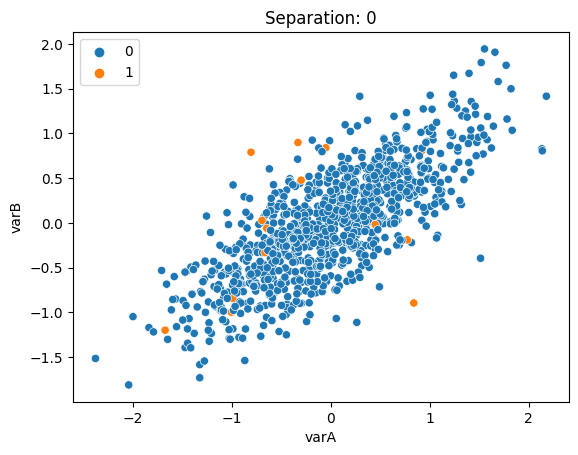

0    983
1     17
dtype: int64


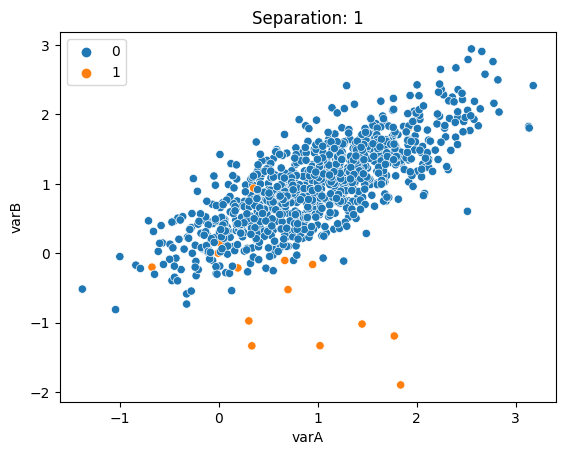

0    983
1     17
dtype: int64


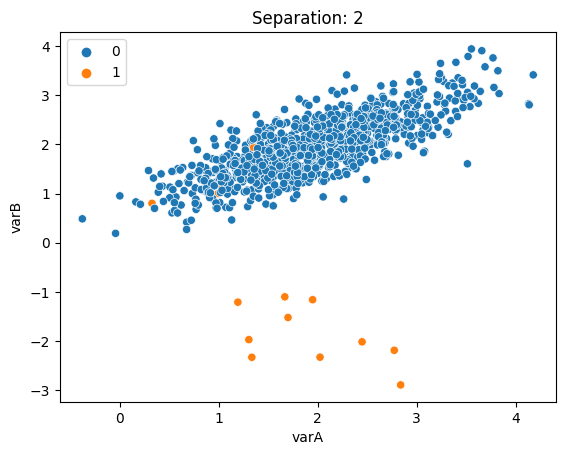

In [4]:
for sep in [0, 1, 2]:
    
    X, y = make_data(sep)
    
    print(y.value_counts())
    
    sns.scatterplot(
        data=X, x="varA", y="varB", hue=y
    )
    
    plt.title('Separation: {}'.format(sep))
    plt.show()

## Random Undersampling

[RandomUnderSampler](https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.RandomUnderSampler.html)


In [4]:

X, y = make_data(sep=2)
rus = RandomUnderSampler(
    sampling_strategy='auto',  # samples only the majority class
    random_state=0,  # for reproducibility
    replacement=True # if it should resample with replacement
)  

X_resampled, y_resampled = rus.fit_resample(X, y)

In [5]:

X.shape, y.shape

((1000, 2), (1000,))

In [6]:

X_resampled.shape, y_resampled.shape

((34, 2), (34,))

In [7]:
y.value_counts()

0    983
1     17
dtype: int64

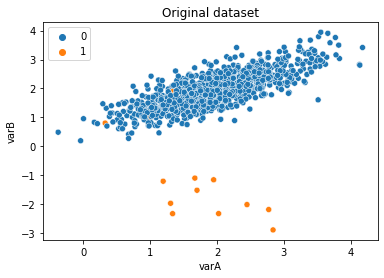

In [8]:
# plot of original data

sns.scatterplot(
    data=X, x="varA", y="varB", hue=y
)

plt.title('Original dataset')
plt.show()

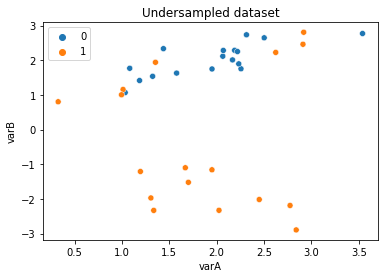

In [9]:
# plot undersampled data

sns.scatterplot(
    data=X_resampled, x="varA", y="varB", hue=y_resampled
)

plt.title('Undersampled dataset')
plt.show()

In [10]:
# now, I will resample the data, so that I obtain
# twice as many observations from the majority as
# those from the minority

rus = RandomUnderSampler(
    sampling_strategy= 0.5,  # remember balancing ratio = x min / x maj
    random_state=0,  
    replacement=False # if it should resample with replacement
)  

X_resampled, y_resampled = rus.fit_resample(X, y)

In [11]:
# size of undersampled data

X_resampled.shape, y_resampled.shape

((51, 2), (51,))

In [12]:
# see that we have twice as many of the majority now

y_resampled.value_counts()

0    34
1    17
dtype: int64

In [13]:
# and we can also specify how many observations we want
# from each class

rus = RandomUnderSampler(
    sampling_strategy= {0:100, 1:15},  # remember balancing ratio = x min / x maj
    random_state=0,  
    replacement=False # if it should resample with replacement
)  

X_resampled, y_resampled = rus.fit_resample(X, y)

In [14]:
# size of undersampled data

X_resampled.shape, y_resampled.shape

((115, 2), (115,))

In [15]:
# we have what we asked for :)

y_resampled.value_counts()

0    100
1     15
dtype: int64